In [1]:
from rasterio.warp import transform_bounds
from pyproj import CRS
import shapely
import geopandas as gpd
import requests
import rasterio
import xarray as xr
import rioxarray
import pystac_client
import numpy as np

# import planetary_computer
from osgeo import gdal, gdalconst
import odc.stac
import os

In [2]:
%cd /panfs/ccds02/nobackup/people/sbhusha1/pcd/Colorado/

/panfs/ccds02/nobackup/people/sbhusha1/pcd/Colorado


In [3]:
ls

CO_final_test_area/  CO_PCD/  wv_asp_products/


In [5]:
lidar_fn = 'CO_final_test_area/CO-PCD_sample_products-DSM_mos.tif'
wv_asp_fn1 = 'wv_asp_products/20190930_2055_102001008BD60800_1020010088168700_1.0m-DEM_trans_dx+0.67m_dy+1.52m_dz+1.00m.tif'
wv_asp_fn2 = 'wv_asp_products/20190930_2055_102001008BE9BB00_102001008EC5AC00_1.0m-DEM_trans_dx+0.31m_dy+1.51m_dz+2.45m.tif'
lidar_da = rioxarray.open_rasterio(lidar_fn,masked=True)
wv_asp1 = rioxarray.open_rasterio(wv_asp_fn1,masked=True)
wv_asp2 = rioxarray.open_rasterio(wv_asp_fn2,masked=True)
wv_asp1 = wv_asp1.rio.reproject_match(lidar_da,
                                      resampling=rasterio.enums.Resampling.bilinear)

wv_asp2 = wv_asp2.rio.reproject_match(lidar_da,
                                      resampling=rasterio.enums.Resampling.bilinear)


In [6]:
%%time
diff1 = wv_asp1 - lidar_da
diff2 = wv_asp2 - lidar_da

CPU times: user 5.77 s, sys: 2.39 s, total: 8.17 s
Wall time: 8.23 s


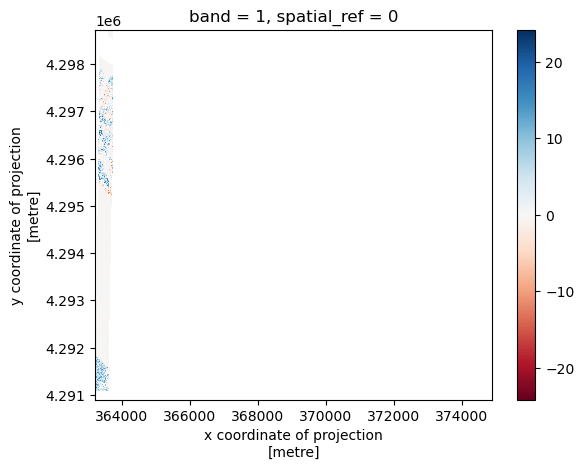

In [7]:
diff1.plot(cmap='RdBu',clim=(-10,10))

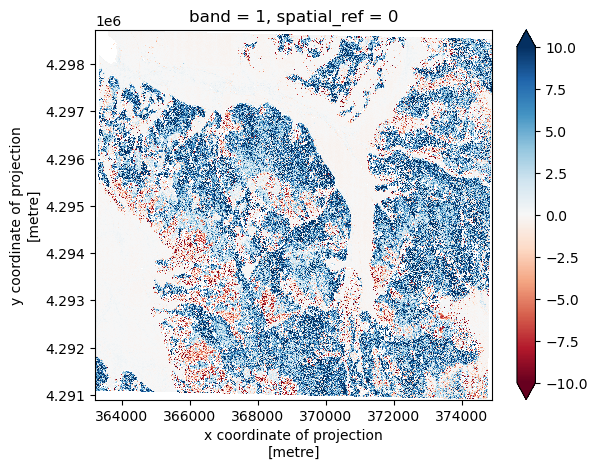

In [9]:
clim = (-10,10)
diff2.plot(cmap='RdBu',vmin = clim[0],vmax = clim[1])